# ***Sparks Foundation (Task 6)***
### **Prediction Using Decision Tree Algorithm**

# **Prithwijit Ghosh**

**Decision tree** may give us a pretty good result with sound basic understanding for small dataset. It is mainly used in the  **classification** problem but it has also a general application towards the regression analysis. Here we have to do with our classification problem with Decision Tree.

### **Dataset link and Decription**

The link of the dataset as provided is given below -- <br>
https://bit.ly/3kXTdox

In [1]:
Iris = read.csv("/content/Iris.csv")
View(head(Iris))

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,1,5.1,3.5,1.4,0.2,Iris-setosa
2,2,4.9,3.0,1.4,0.2,Iris-setosa
3,3,4.7,3.2,1.3,0.2,Iris-setosa
4,4,4.6,3.1,1.5,0.2,Iris-setosa
5,5,5.0,3.6,1.4,0.2,Iris-setosa
6,6,5.4,3.9,1.7,0.4,Iris-setosa


Now let us install all the necessary packages that are useful for our analysis.

In [2]:
install.packages("caret")  #For Fitting the Decision Tree
install.packages("rpart.plot")  #For graphical Visualization

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Let's lode our packages in the current environment.

In [3]:
library(caret)
library(rpart.plot)

Loading required package: ggplot2

Loading required package: lattice

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
Loading required package: rpart



# **Data Preparation**
Inour dataset we find that ID no is taken to be an column and that we must have to remove.

In [4]:
Iris= Iris[,-1]
View(head(Iris))

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
6,5.4,3.9,1.7,0.4,Iris-setosa


Next we wil check whether there is any missing values in our dataset.

In [5]:
sum(is.na(Iris))

[1] 0

# **Feature Engineering**
Now we have to split our dataset into two component <br>
**i.** Training Data<br>
**ii.** Test Data<br>

Here we are randomly split the data into two parts, one is the majority part that wee will use for fitting the model and the other is the minoriy part that will be used for the predicting purpose.<br>
For the majority class(training) we choose 60% of our data and for the minority class(test) it is the remaining 40%.


In [6]:
set.seed(52307831)
data_60_ = floor((nrow(Iris)*0.6))
train_index_ = sample(nrow(Iris),data_60_)
Iris_train = Iris[train_index_,]
Iris_test = Iris[-train_index_,]

In [14]:
dim(Iris_train) #Diemension of the original dataset
dim(Iris_test)  #Diemension of the training dataset
dim(Iris)       #Diemension of the test dataset

[1] 90  5

[1] 60  5

[1] 150   5

# **Model Fitting**
Now we will fit our model to the training data. But for achieving the optimal model with largest accuracy is selected by the **Repeated Cross Validation** approach. Finally we will get the complexity parameter for the optimal model and then will predict the final test dataset based that model.

In [ ]:
set.seed(81754603)
crtl = trainControl(method = "repeatedcv",number = 5,repeats = 10)
Decision_tree = train(factor(Species)~.,data = Iris_train,method = "rpart",
                      trControl = crtl,
                      metric = "Accuracy",parms = list(split = "information"),tuneLength = 300)

In [42]:
print(tail(Decision_tree$results))
print (Decision_tree$bestTune)

           cp  Accuracy      Kappa AccuracySD   KappaSD
295 0.4916388 0.6275576 0.42923310  0.1390896 0.2190287
296 0.4933110 0.6275576 0.42923310  0.1390896 0.2190287
297 0.4949833 0.6275576 0.42923310  0.1390896 0.2190287
298 0.4966555 0.6275576 0.42923310  0.1390896 0.2190287
299 0.4983278 0.6275576 0.42923310  0.1390896 0.2190287
300 0.5000000 0.4067045 0.08557692  0.1202381 0.1845254
           cp
268 0.4464883


We observe that the best tuned model has the complexity parameter(cp) 0.4464883 and the model is the 268th model.

Let plot the above situation

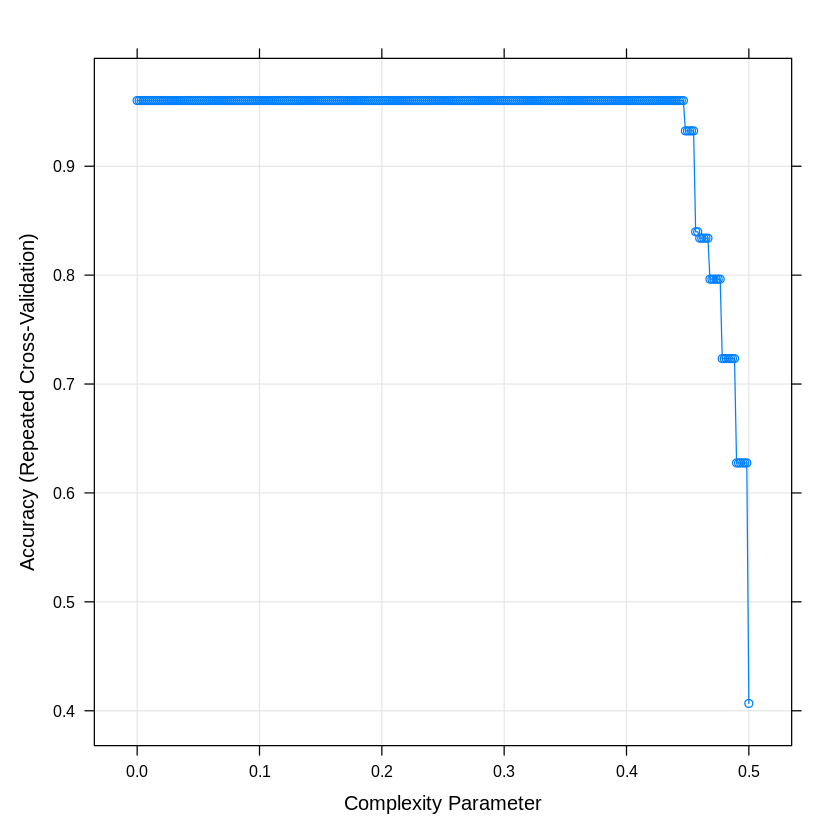

In [43]:
plot(Decision_tree)

Now we plot the decision tree for the given setup.

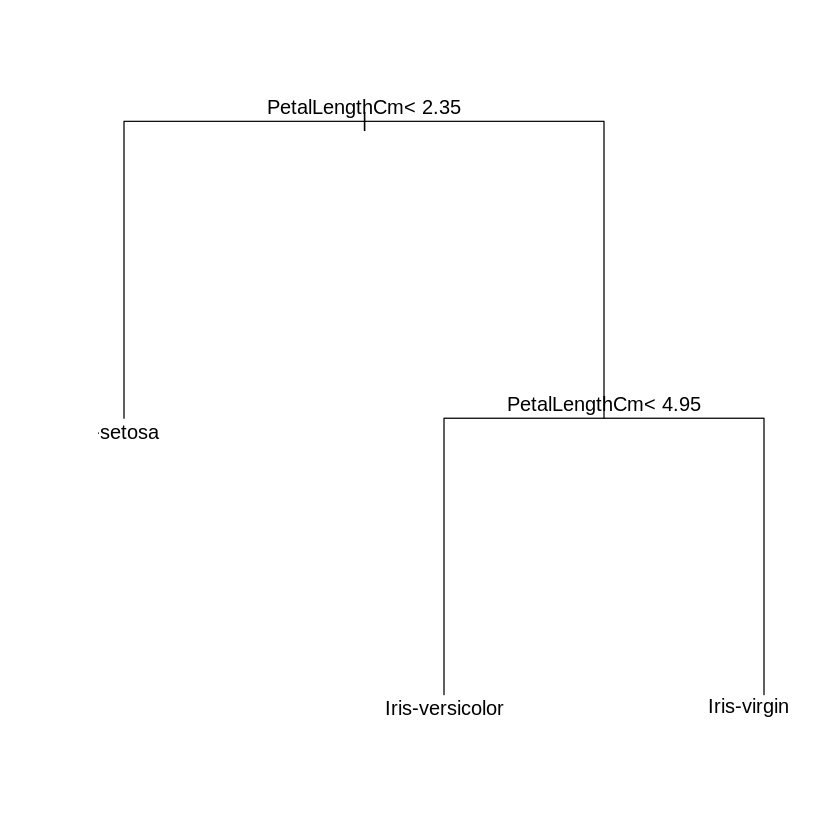

In [44]:
plot(Decision_tree$finalModel)
text(Decision_tree$finalModel)

The above plot is pretty simple but the graphics quality is not so good, so we turn into the next graphics package **rpar.plot**

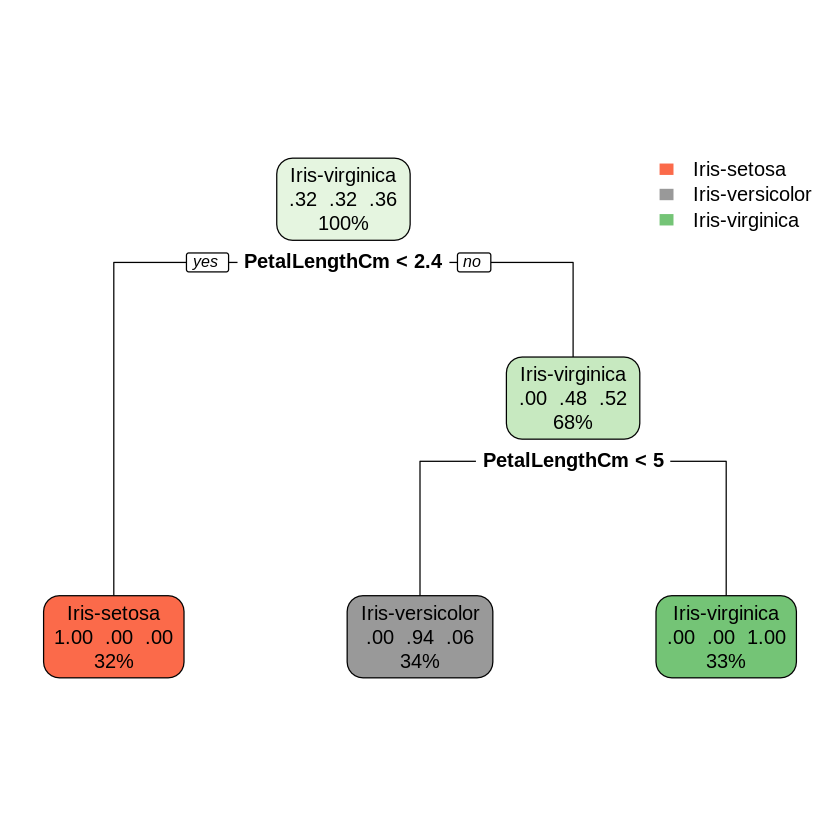

In [45]:
rpart.plot(Decision_tree$finalModel)

Here at first we see that if the **Petal Length** < 2.4 cm then surely it is **Iris-Setosa**, otherwise if the Petal Length < 5 cm then it is **Iris-Versicolor**,otherwise it is **Iris_Virginica**.

In [46]:
Decision_tree_fit = predict(Decision_tree,newdata = Iris_test)
confusionMatrix(table(Decision_tree_fit,Iris_test$Species))

Confusion Matrix and Statistics

                 
Decision_tree_fit Iris-setosa Iris-versicolor Iris-virginica
  Iris-setosa              21               0              0
  Iris-versicolor           0              19              4
  Iris-virginica            0               2             14

Overall Statistics
                                          
               Accuracy : 0.9             
                 95% CI : (0.7949, 0.9624)
    No Information Rate : 0.35            
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.8492          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: Iris-setosa Class: Iris-versicolor
Sensitivity                        1.00                 0.9048
Specificity                        1.00                 0.8974
Pos Pred Value                     1.00                 0.8261
Neg Pred Value         

Here we predict our **best tuned** model on the test dataset and find the above confusion matrix, where we see that only **6 observations are misclassified** for the class **Iris_Versicolor** and **Iris-Virginica** but there is no misclassification for the Iris-Setosa. The model overall **accuracy is 0.90** which is quite better. Only the **Sensitivity** for the class **Iris-Virginica is 0.77**, quite small, but for all other class all the measures are quite satified. Finally we can improve our model with the use of **Random Forest** on top of this decision tree, but that's not required for our purpose and hence ot is completed.